# Titanic: First Machine Learning Model
<div style="text-align: justify">
Muitos devem conhecer a história do naufrágio do Titanic, uma tragédia que ninguém esperava por ser o navio mais moderno e bem construído da época. O ocorrido ficou marcado na mente da maioria das pessoas e ganhou ainda mais destaque com o lançamento do filme sobre o mesmo que ganhou vários prêmios no Óscar.


O desafio do Titanic é conhecido por ser um ótimo projeto para iniciantes na área de Data Science se aventurarem, provável se tornando o famoso **'Hello World'** do Data Science. Então aqui estou para me aventurar, analisar e criar uma modelo para o desafio de prever quem sobreviveria ao naufrágio.
</div>



## 1 - Definição do problema:

<div style="text-align: justify">
O naufrágio do Titanic ficou marcado na história grande parte pelo número de sobreviventes (apenas 722 de 2224 passageiros), e por ser o navio mais moderno com a fama de ser o navio "inafundável". Mais tarde foi descoberto os motivos do desastre, grande parte com falha humana (negligência do risco) e clima.
<br><br>

Muitos dos sobreviventes contaram com a sorte, mas será que somente a sorte foi a causa da salvação!? Ou existe um padrão por trás dos sobreviventes ao naufrágio.

<br><br><br>


O objetivo desse desafio é descobrir padrões nos dados do acidente, **encontrando variáveis** que influenciaram mais na sobrevivência e **criar um modelo** que receba como *input* informações de um passageiro e de a precisão se ele sobreviveria ao acidente ou não.

<br><br>
*A descrição completa da competição, assim como o conjunto de dados, está disponível na página do [Kaggle Titanic: Machine Learning from Disaster.](https://www.kaggle.com/c/titanic)*
</div>

## 2 - Obtenção dos dados:
Os dados do desafio estão disponíveis em [Kaggle](https://www.kaggle.com/c/titanic/data).
<br><br>

São disponibilizados três arquivos:
1. *train.csv:*
    * Informações sobre os passageiros e  se eles sobreviveram ou não ao acidente, deve ser utilizado para treinar o modelo.  
2. *test.csv:*
    * Informações sobre os passageiros porém não contém a informação sobre a sobrevivência do passageiro, deve ser usado nos testes como dados que nunca foram vistos pelo modelo.
3. *gender_submission:*
    * Um exemplo de como os dados devem ser entregues no fim do desafio.
    


In [1]:
# importando bibliotecas que serão utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

## 3 - Exploração dos Dados:
<div style="text-align: justify">
A primeira análise a ser feita deve é sobre as variáveis existentes no conjunto de dados, algumas informações importantes devem ser coletadas como nome, tipo, porcentagem de dados faltantes e a presença de outliers.
<br><br>
</div>

### Descrição das Variáveis:
* **PassengerId:** Número de identificação do passageiro [chave primária];
* **Survived:** Se o passageiro sobreviveu ou não (0 = No / 1 = Yes);
* **Pclass:** Classe da passagem (1 = 1st, 2 = 2nd, 3 = 3rd);
* **Name:** Nome do passageiro;
* **Sex:** Sexo do passageiro;
* **Age:** Idade do passageiro;
* **SibSp:** Número de irmãos ou cônjuges;
* **Parch:** Número de pais ou filhos;
* **Ticket:** Número da passagem;
* **Fare:** Preço da passagem;
* **Cabin:** Cabine do passageiro;
* **Embarked:** Porto em qual embarcou (C = Cherbourg, Q = Queenstown, S = Southampton)


In [3]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Dados faltantes:
A variável que possui maior número de informações faltantes é **Cabin** com 77%, logo em seguido vem **Age** com quase 20%. Por fim, temos **Embarked** com apenas 2%.

In [4]:
(train.isnull().sum()/train.shape[0]).sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
PassengerId    0.000000
dtype: float64

### Descobrindo padrões


In [5]:
# Estatísticas gerais
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Incluindo variáveis não numericas
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hakkarainen, Mr. Pekka Pietari",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a8b77dc90>,
      dtype=object)

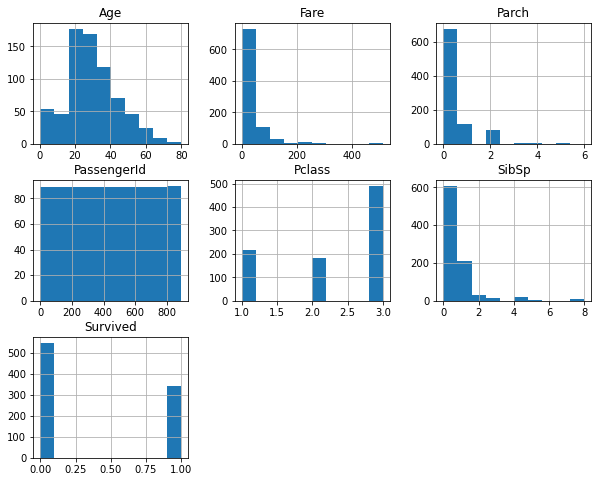

In [7]:
# Distribuição da varíaveis
train.hist(figsize=(10, 8))

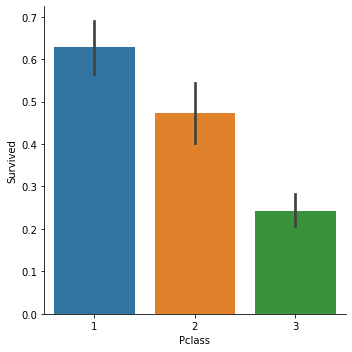

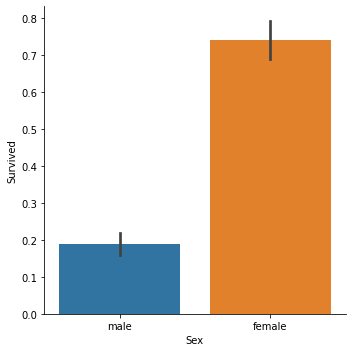

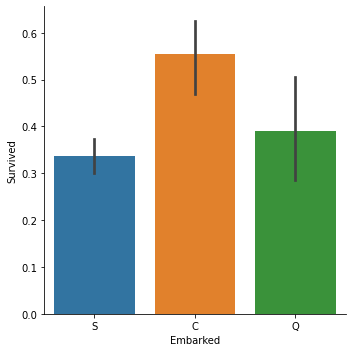

In [8]:
# Analisando a taxa de sobrevivência nos grupos 'Pclass', 'Sex' e 'Embarked' 
sns.catplot(x='Pclass', y='Survived', data=train, kind='bar')
sns.catplot(x='Sex', y='Survived', data=train, kind='bar')
sns.catplot(x='Embarked', y='Survived', data=train, kind='bar')

In [9]:
# Média de sobreviventes de acordo pelo Sexo
train[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


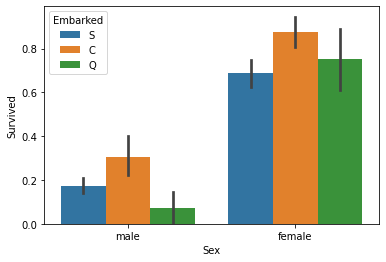

In [10]:
# Analisando novamente o porto de embarque
sns.barplot(x="Sex", y="Survived", hue="Embarked", data=train)

*Obs: aparentemente o porto de Southampton foi o que mais embarcou, provável sendo o porto de saída, mas foi o que menos sobreviveu pessoas*

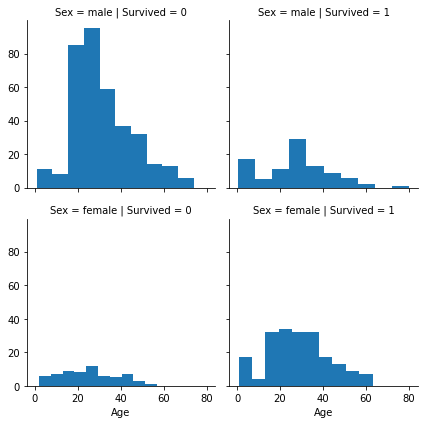

In [11]:
# Impactio da idade na chance de sobrevivência
graficos = sns.FacetGrid(train, col="Survived", row='Sex')
graficos = graficos.map(plt.hist, 'Age')

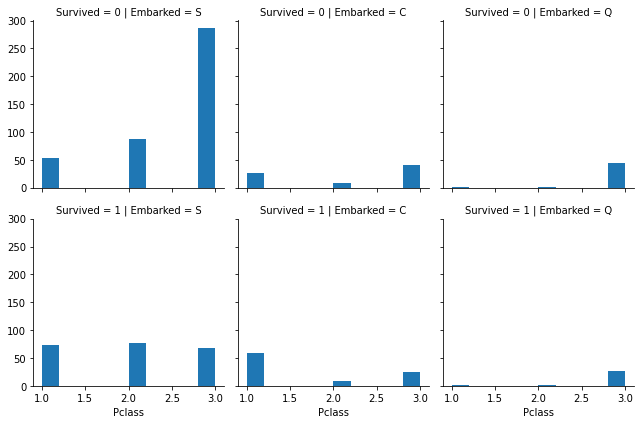

In [12]:
grafico = sns.FacetGrid(train, col="Embarked", row='Survived')
grafico = grafico.map(plt.hist, 'Pclass')

Observando os gráficos acima tiramos alguma conclusões:
* O Sexo parece ser a variável que possui maior influência na sobrevivência;
* Também reconhecemos que a Classe e o Porto em qual embarcou parece impactar também;
* E também a idade teve influência, apesar de ser menor do que eu esperava

## 4 - Preparação dos Dados:

## Juntando os DataSets
Muitas vezes iremos alterar a estrutura do Data Set de treino,codificando ou alterando variáveis, para criar o modelo em cima dessa nova arquitetura. Com isso os dados de teste vão ter que possuir essa nova arquitetura também, por isso é mais fácil juntar ambos realizar as mudanças e separá-los no final. 

In [13]:
# Salvando os índices
train_idx = train.shape[0]
test_idx = test.shape[0]

# Salvando o passengerId para a submissão no Kaggle
passenger_Id = test['PassengerId']

# Criando copia da coluna 'Survived para extrai-la durante a preparação'
target = train['Survived'].copy()
train.drop(['Survived'], axis=1, inplace=True)

# Concatenando os DataFrames
df_merged = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

## Selecionando as Features:

Um dos principais serviços de um cientista de dados é descobrir quais features possuem maior relevância para a criação dos modelo de Machine Learning.

Para esse modelo, vamos desconsiderar as variáveis ['PassengerId', 'Name', 'Ticket', 'Cabin'], pois aparentemente não possuem grande impacto na sobrevivência dos passageiros

In [14]:
df_merged.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

## Dados faltantes

Muito provável que dados estejam faltando, devemos analisar eles e definir o que podemos fazer.
Geralmente duas abordagens são utilizadas:
   * Excluir a linha inteira;
   * Preencher os valores (Média, Mediana, Valor acima ou abaixo, Valor mais frequente).

Muitas vezes não é vantajoso excluir uma linha inteira, então sempre que possível devemos tentar preencher o valor.

In [15]:
df_merged.describe()

,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,80.000000,8.000000,9.000000,512.329200


In [16]:
df_merged.describe(include=['O'])

,Sex,Embarked
count,1309,1307
unique,2,3
top,male,S
freq,843,914


Para a tarifa e a idade colocarei o valor da mediana e para o porto de embarque colocarei o mais frequente.

In [17]:
# idade
mediana_idade = df_merged['Age'].median()
df_merged['Age'].fillna(mediana_idade, inplace=True)

#tarifa
mediana_tarifa = df_merged['Fare'].median()
df_merged['Fare'].fillna(mediana_tarifa, inplace=True)

# Porto de embarque
porto_frequente = df_merged['Embarked'].sort_values()[0]
df_merged['Embarked'].fillna(porto_frequente, inplace=True)

## Preparando as variáveis

Modelos matemáticos precisam de variáveis numéricas, logo nosso próximo passo é transformar as variáveis categóricas em numéricas.
* Para a variável *'Sex'* transformaremos os valores {'male': 0, 'female': 1};
* Já para a variável 'Embarked' aplicarei o conceito de variáveis dummies¹;

*obs: 1 - variáveis dummies são variáveis que assumem valores 0 ou 1, para a substituição de variáveis categóricas é criado uma coluna extra para cada possibilidade e preenchido com 1 na categoria da linha e 0 nas extras*

In [18]:
df_merged.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [19]:
df_merged['Sex'] = df_merged['Sex'].map({'male': 0, 'female': 1})

embarked_dummies = pd.get_dummies(df_merged['Embarked'], prefix='Embarked')
df_merged = pd.concat([df_merged, embarked_dummies], axis=1)
df_merged.drop(['Embarked'], axis=1, inplace=True)
df_merged.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,1


## Recuperação dos datasets

Agora que acabamos de alterar a arquitetura do Data Set vamos restaurar a versão original, com isso ambos já estão prontos para serem utilizados. Caso não tivéssemos unido os Data Set teríamos que fazer o mesmo procedimento para o Data Set de teste.

In [20]:
train = df_merged.iloc[:train_idx]
test = df_merged.iloc[train_idx:]

## 5 - Criação do Modelo:

Chegamos na parte que para mim parecia ser a mais complicada, por existir um grande breu, a criação do modelo de *Machine Learning*.

Mas com o curso liberado pelo [Kaggle: Intro to Machine Learning](https://www.kaggle.com/learn/intro-to-machine-learning) clareou minha mente e mostrou que com algumas bibliotecas e poucas linhas podemos criar alguns modelos básicos, o que facilita muito para quem está começando.

Nesse projeto utilizarei dois modelos:
* Random Forest Classifier;
* Decision Tree Classifier.

Ambos forem explicados no curso que mencionei acima, então recomendo fortemente que se estiverem começando na área que façam ele.

In [21]:
# Importanto os modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [22]:
# Criando e treinando o primeiro modelo
dt_model = DecisionTreeClassifier(random_state=1)
dt_model.fit(train, target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [23]:
# Fazendo as predições
y_pred_dt = dt_model.predict(test)

# Colocando no modelo pedido pelo Kaggle para submissão
submission = pd.DataFrame({
    "PassengerId": passenger_Id,
    "Survived": y_pred_dt
})

# Gerando o arquivo 
submission.to_csv('./submission_dt.csv', index=False)

O modelo de Árvore de Decisão ficou com 73.20%, o que é uma pontuação muito boa para um primeiro modelo. 

In [24]:
# criando e treinando segundo modelo
rf_model = RandomForestClassifier()
rf_model.fit(train, target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
# Fazendo as predições
y_pred_rf = rf_model.predict(test)

# Colocando no modelo pedido pelo Kaggle para submissão
submission = pd.DataFrame({
    'PassengerId': passenger_Id,
    'Survived': y_pred_rf
})

# Gerando o arquivo 
submission.to_csv('./submission_rf.csv', index=False)

Já com o modelo Random Forest tivemos uma pequeno ganho de acurácia, ficando com 75.59% de acurácia. Um ótimo ganho por apenas trocar de modelo.

## Eu sobreviveria ao Titanic!?

Agora que o modelo foi finalizado chegamos ao momento mais esperado, será que eu sobreviveria ao Titanic!? Vou fazer o teste colocando como preço da tarifa a mediana e com porto de embarque o mais frequente para fazer o teste.

In [26]:
median_fare = train['Fare'].median()
alex = np.array([3, 0, 21, 0, 0, median_fare, 0, 0, 1]).reshape((1,-1))

In [27]:
rf_model.predict(alex)[0]

0

Bem, infelizmente meu próprio modelo indicou que eu não sobreviveria ao Titanic.

## Conclusão:

Gostei muito de fazer esse projeto e achei realmente bom para se iniciar por ele. Tive dificuldade em analisar certas variáveis e entender o que os gráficos expressavam, achando que fiz coisas bem superficiais. Mas com isso já sei que preciso melhorar e tenho um certo rumo agora além de um projeto feito.